In [1]:
import sys
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from typing import Dict, List, Tuple

# Import your modules
from generator import generator
from validator import validate_mst
from prim import prim_n2, prim_mlogn
from kruskal import kruskal

# Set up plotting style
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)

In [2]:
def benchmark_algorithm(algorithm, n, edges_list, name):
    """Benchmark a single algorithm and return runtime in milliseconds."""
    start_time = time.perf_counter()
    mst = algorithm(n, edges_list)
    end_time = time.perf_counter()
    
    # Validate result
    if not validate_mst(n, edges_list, mst):
        raise ValueError(f"{name} failed validation")
    
    return (end_time - start_time) * 1000  # Convert to milliseconds

def run_size_benchmark(n_values, p=0.5, trials=5):
    """Benchmark algorithms across different graph sizes."""
    algorithms = {
        'Kruskal': kruskal,
        'Prim O(n²)': prim_n2,
        'Prim O(m log n)': prim_mlogn
    }
    
    results = {name: [] for name in algorithms.keys()}
    results['n'] = []
    results['avg_edges'] = []
    
    for n in n_values:
        print(f"Testing n={n}...")
        
        # Generate test graphs
        test_graphs = []
        total_edges = 0
        
        for _ in range(trials):
            edges = generator(n, p, seed=None)
            if len(edges) >= n - 1:  # Ensure connected
                test_graphs.append(edges)
                total_edges += len(edges)
        
        if not test_graphs:
            print(f"Skipping n={n} - no valid graphs")
            continue
            
        avg_edges = total_edges / len(test_graphs)
        
        # Benchmark each algorithm
        algorithm_times = {name: [] for name in algorithms.keys()}
        
        for edges in test_graphs:
            for name, alg in algorithms.items():
                try:
                    runtime = benchmark_algorithm(alg, n, edges, name)
                    algorithm_times[name].append(runtime)
                except Exception as e:
                    print(f"Error with {name} on n={n}: {e}")
        
        # Store results
        results['n'].append(n)
        results['avg_edges'].append(avg_edges)
        
        for name in algorithms.keys():
            if algorithm_times[name]:
                avg_time = np.mean(algorithm_times[name])
                results[name].append(avg_time)
            else:
                results[name].append(np.nan)
        
        print(f"  Average edges: {avg_edges:.1f}")
        for name in algorithms.keys():
            if algorithm_times[name]:
                avg_time = np.mean(algorithm_times[name])
                std_time = np.std(algorithm_times[name])
                print(f"  {name}: {avg_time:.3f}ms ± {std_time:.3f}ms")
    
    return pd.DataFrame(results)

def run_density_benchmark(n=100, p_values=None, trials=5):
    """Benchmark algorithms across different graph densities."""
    if p_values is None:
        p_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    
    algorithms = {
        'Kruskal': kruskal,
        'Prim O(n²)': prim_n2,
        'Prim O(m log n)': prim_mlogn
    }
    
    results = {name: [] for name in algorithms.keys()}
    results['p'] = []
    results['avg_edges'] = []
    
    for p in p_values:
        print(f"Testing p={p}...")
        
        # Generate test graphs
        test_graphs = []
        total_edges = 0
        
        for _ in range(trials):
            edges = generator(n, p, seed=None)
            if len(edges) >= n - 1:  # Ensure connected
                test_graphs.append(edges)
                total_edges += len(edges)
        
        if not test_graphs:
            print(f"Skipping p={p} - no valid graphs")
            continue
            
        avg_edges = total_edges / len(test_graphs)
        
        # Benchmark each algorithm
        algorithm_times = {name: [] for name in algorithms.keys()}
        
        for edges in test_graphs:
            for name, alg in algorithms.items():
                try:
                    runtime = benchmark_algorithm(alg, n, edges, name)
                    algorithm_times[name].append(runtime)
                except Exception as e:
                    print(f"Error with {name} on p={p}: {e}")
        
        # Store results
        results['p'].append(p)
        results['avg_edges'].append(avg_edges)
        
        for name in algorithms.keys():
            if algorithm_times[name]:
                avg_time = np.mean(algorithm_times[name])
                results[name].append(avg_time)
            else:
                results[name].append(np.nan)
        
        print(f"  Average edges: {avg_edges:.1f}")
        for name in algorithms.keys():
            if algorithm_times[name]:
                avg_time = np.mean(algorithm_times[name])
                std_time = np.std(algorithm_times[name])
                print(f"  {name}: {avg_time:.3f}ms ± {std_time:.3f}ms")
    
    return pd.DataFrame(results)

In [3]:
# Test performance vs graph size
print("=== Benchmarking vs Graph Size ===")
size_results = run_size_benchmark(
    n_values=[10, 20, 30, 50, 75, 100, 150, 200],
    p=0.5,
    trials=3
)

size_results

=== Benchmarking vs Graph Size ===
Testing n=10...
  Average edges: 22.0
  Kruskal: 0.048ms ± 0.007ms
  Prim O(n²): 0.054ms ± 0.002ms
  Prim O(m log n): 0.032ms ± 0.002ms
Testing n=20...
  Average edges: 98.7
  Kruskal: 0.112ms ± 0.013ms
  Prim O(n²): 0.241ms ± 0.016ms
  Prim O(m log n): 0.093ms ± 0.009ms
Testing n=30...
  Average edges: 212.7
  Kruskal: 0.195ms ± 0.024ms
  Prim O(n²): 0.534ms ± 0.021ms
  Prim O(m log n): 0.158ms ± 0.004ms
Testing n=50...
  Average edges: 619.3
  Kruskal: 0.406ms ± 0.007ms
  Prim O(n²): 2.511ms ± 0.053ms
  Prim O(m log n): 0.631ms ± 0.166ms
Testing n=75...
  Average edges: 1382.0
  Kruskal: 0.807ms ± 0.068ms
  Prim O(n²): 8.334ms ± 0.364ms
  Prim O(m log n): 1.235ms ± 0.066ms
Testing n=100...
  Average edges: 2483.7
  Kruskal: 1.607ms ± 0.103ms
  Prim O(n²): 18.950ms ± 0.417ms
  Prim O(m log n): 2.207ms ± 0.114ms
Testing n=150...
  Average edges: 5578.3
  Kruskal: 3.494ms ± 0.263ms
  Prim O(n²): 63.914ms ± 0.887ms
  Prim O(m log n): 16.504ms ± 16.924ms

,Kruskal,Prim O(n²),Prim O(m log n),n,avg_edges
0,0.047806,0.054458,0.031680,10,22.000000
1,0.111889,0.240972,0.093292,20,98.666667
2,0.195430,0.533514,0.158083,30,212.666667
3,0.405944,2.511389,0.631167,50,619.333333
4,0.807263,8.333597,1.235181,75,1382.000000
5,1.607292,18.950042,2.206736,100,2483.666667
6,3.494250,63.914333,16.504056,150,5578.333333
7,6.244944,151.969375,8.212083,200,10001.000000


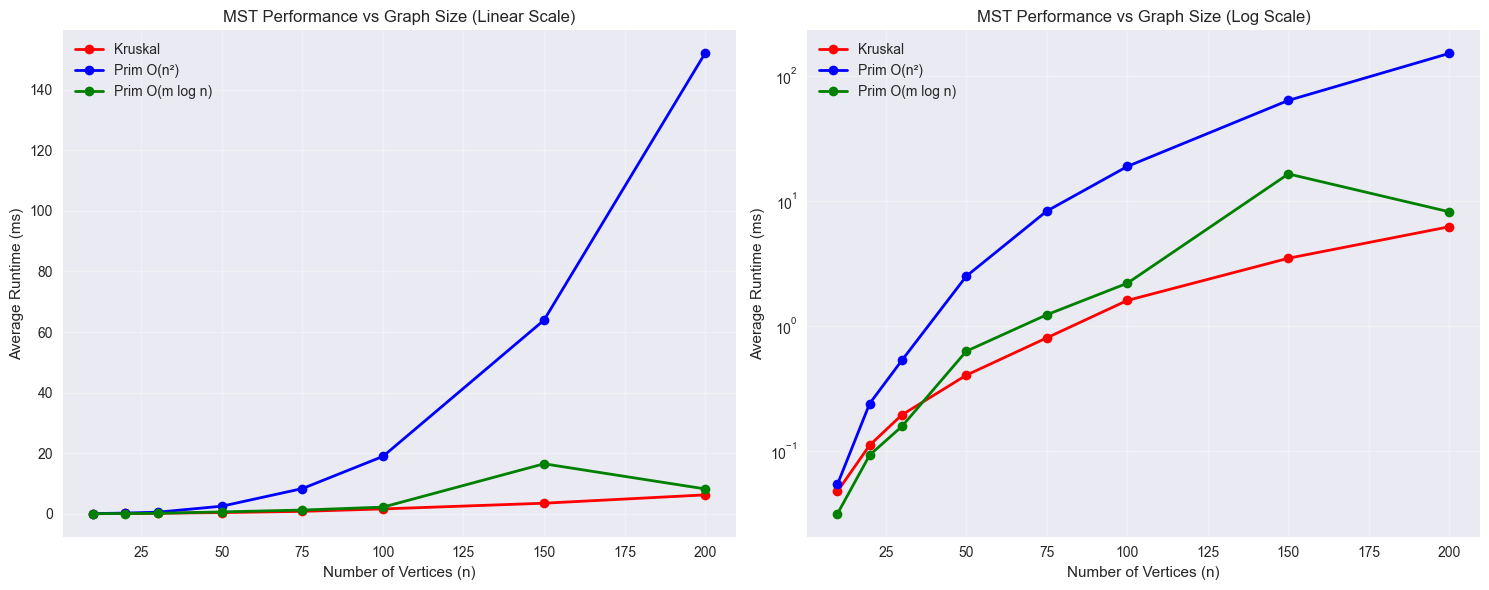

In [4]:
# Plot performance vs graph size
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Linear scale
algorithms = ['Kruskal', 'Prim O(n²)', 'Prim O(m log n)']
colors = ['red', 'blue', 'green']

for alg, color in zip(algorithms, colors):
    ax1.plot(size_results['n'], size_results[alg], 
             marker='o', label=alg, color=color, linewidth=2)

ax1.set_xlabel('Number of Vertices (n)')
ax1.set_ylabel('Average Runtime (ms)')
ax1.set_title('MST Performance vs Graph Size (Linear Scale)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Log scale
for alg, color in zip(algorithms, colors):
    ax2.plot(size_results['n'], size_results[alg], 
             marker='o', label=alg, color=color, linewidth=2)

ax2.set_xlabel('Number of Vertices (n)')
ax2.set_ylabel('Average Runtime (ms)')
ax2.set_title('MST Performance vs Graph Size (Log Scale)')
ax2.set_yscale('log')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [5]:
# Test performance vs graph density
print("=== Benchmarking vs Graph Density ===")
density_results = run_density_benchmark(
    n=100,
    p_values=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    trials=3
)

density_results

=== Benchmarking vs Graph Density ===
Testing p=0.1...
  Average edges: 469.0
  Kruskal: 0.591ms ± 0.069ms
  Prim O(n²): 3.904ms ± 0.017ms
  Prim O(m log n): 0.513ms ± 0.072ms
Testing p=0.2...
  Average edges: 1001.0
  Kruskal: 0.933ms ± 0.199ms
  Prim O(n²): 7.889ms ± 0.125ms
  Prim O(m log n): 0.948ms ± 0.040ms
Testing p=0.3...
  Average edges: 1466.0
  Kruskal: 1.179ms ± 0.189ms
  Prim O(n²): 11.435ms ± 0.163ms
  Prim O(m log n): 1.682ms ± 0.036ms
Testing p=0.4...
  Average edges: 1981.0
  Kruskal: 1.262ms ± 0.097ms
  Prim O(n²): 15.418ms ± 0.315ms
  Prim O(m log n): 1.644ms ± 0.073ms
Testing p=0.5...
  Average edges: 2466.0
  Kruskal: 1.398ms ± 0.088ms
  Prim O(n²): 19.012ms ± 0.313ms
  Prim O(m log n): 2.094ms ± 0.120ms
Testing p=0.6...
  Average edges: 2931.3
  Kruskal: 1.850ms ± 0.063ms
  Prim O(n²): 22.737ms ± 0.435ms
  Prim O(m log n): 2.505ms ± 0.059ms
Testing p=0.7...
  Average edges: 3441.3
  Kruskal: 1.968ms ± 0.026ms
  Prim O(n²): 26.831ms ± 0.502ms
  Prim O(m log n): 2.9

,Kruskal,Prim O(n²),Prim O(m log n),p,avg_edges
0,0.591361,3.904139,0.512750,0.1,469.000000
1,0.933250,7.889111,0.947667,0.2,1001.000000
2,1.179375,11.434653,1.681708,0.3,1466.000000
3,1.261777,15.418208,1.644236,0.4,1981.000000
4,1.397903,19.011959,2.094278,0.5,2466.000000
5,1.850430,22.737486,2.505222,0.6,2931.333333
6,1.967597,26.831430,2.908750,0.7,3441.333333
7,2.500778,30.629000,3.411778,0.8,3964.000000
8,2.907083,34.133000,3.846972,0.9,4458.000000


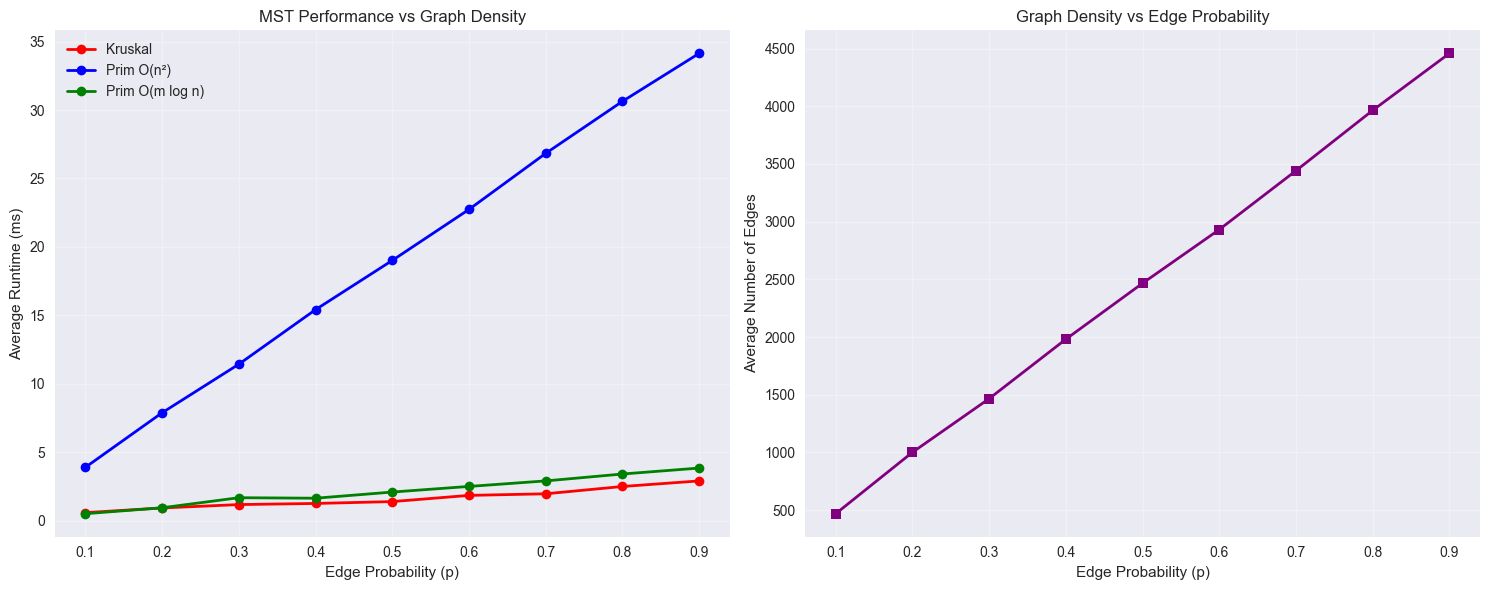

In [6]:
# Plot performance vs density
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Runtime vs density
for alg, color in zip(algorithms, colors):
    ax1.plot(density_results['p'], density_results[alg], 
             marker='o', label=alg, color=color, linewidth=2)

ax1.set_xlabel('Edge Probability (p)')
ax1.set_ylabel('Average Runtime (ms)')
ax1.set_title('MST Performance vs Graph Density')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Number of edges vs density
ax2.plot(density_results['p'], density_results['avg_edges'], 
         marker='s', color='purple', linewidth=2)
ax2.set_xlabel('Edge Probability (p)')
ax2.set_ylabel('Average Number of Edges')
ax2.set_title('Graph Density vs Edge Probability')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [7]:
# Analyze theoretical vs actual complexity
print("=== Complexity Analysis ===")

# For size analysis (p=0.5)
max_n = size_results['n'].max()
print(f"\nFor graphs with n up to {max_n} vertices:")

for alg in algorithms:
    if not size_results[alg].isna().all():
        ratio = size_results[alg].iloc[-1] / size_results[alg].iloc[0]
        n_ratio = size_results['n'].iloc[-1] / size_results['n'].iloc[0]
        print(f"{alg}: {ratio:.2f}x slower for {n_ratio:.1f}x larger graphs")

print(f"\nFor graphs with density p from {density_results['p'].min()} to {density_results['p'].max()}:")

for alg in algorithms:
    if not density_results[alg].isna().all():
        ratio = density_results[alg].iloc[-1] / density_results[alg].iloc[0]
        edge_ratio = density_results['avg_edges'].iloc[-1] / density_results['avg_edges'].iloc[0]
        print(f"{alg}: {ratio:.2f}x slower for {edge_ratio:.1f}x more edges")

=== Complexity Analysis ===

For graphs with n up to 200 vertices:
Kruskal: 130.63x slower for 20.0x larger graphs
Prim O(n²): 2790.58x slower for 20.0x larger graphs
Prim O(m log n): 259.22x slower for 20.0x larger graphs

For graphs with density p from 0.1 to 0.9:
Kruskal: 4.92x slower for 9.5x more edges
Prim O(n²): 8.74x slower for 9.5x more edges
Prim O(m log n): 7.50x slower for 9.5x more edges
